In [6]:
import pandas as pd
from prophet import Prophet

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_R.csv')
df

,ds,y
0,2008-01-30,5.976351
1,2008-01-16,6.049733
2,2008-01-17,6.011267
3,2008-01-14,5.953243
4,2008-01-15,5.910797
...,...,...
2858,2015-12-11,7.834788
2859,2015-12-12,7.360104
2860,2015-12-13,7.479864
2861,2015-12-18,7.765145


In [4]:
df['cap'] = 8.5
df

,ds,y,cap
0,2008-01-30,5.976351,8.5
1,2008-01-16,6.049733,8.5
2,2008-01-17,6.011267,8.5
3,2008-01-14,5.953243,8.5
4,2008-01-15,5.910797,8.5
...,...,...,...
2858,2015-12-11,7.834788,8.5
2859,2015-12-12,7.360104,8.5
2860,2015-12-13,7.479864,8.5
2861,2015-12-18,7.765145,8.5


In [13]:
df['y'].min(), df['y'].max()

(0.94246121828178, 5.92246255609428)

In [7]:
m = Prophet(growth='logistic')
m.fit(df)

09:42:35 - cmdstanpy - INFO - Chain [1] start processing
09:42:35 - cmdstanpy - INFO - Chain [1] done processing


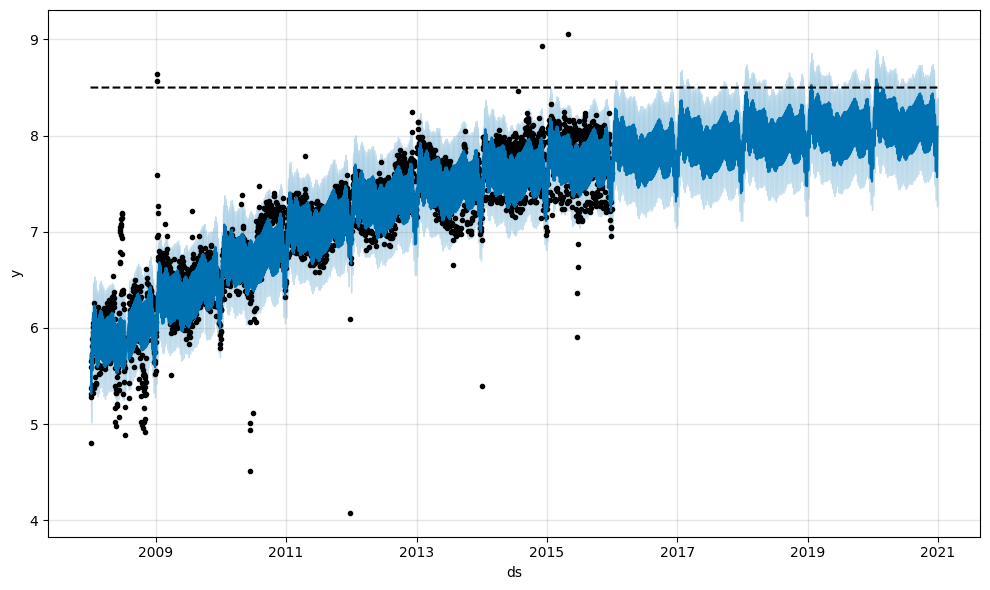

In [9]:
future = m.make_future_dataframe(periods=1826)
future['cap'] = 8.5
fcst = m.predict(future)
fig = m.plot(fcst)

In [10]:
future

,ds,cap
0,2008-01-01,8.5
1,2008-01-02,8.5
2,2008-01-03,8.5
3,2008-01-04,8.5
4,2008-01-05,8.5
...,...,...
4684,2020-12-26,8.5
4685,2020-12-27,8.5
4686,2020-12-28,8.5
4687,2020-12-29,8.5


09:57:15 - cmdstanpy - INFO - Chain [1] start processing
09:57:15 - cmdstanpy - INFO - Chain [1] done processing


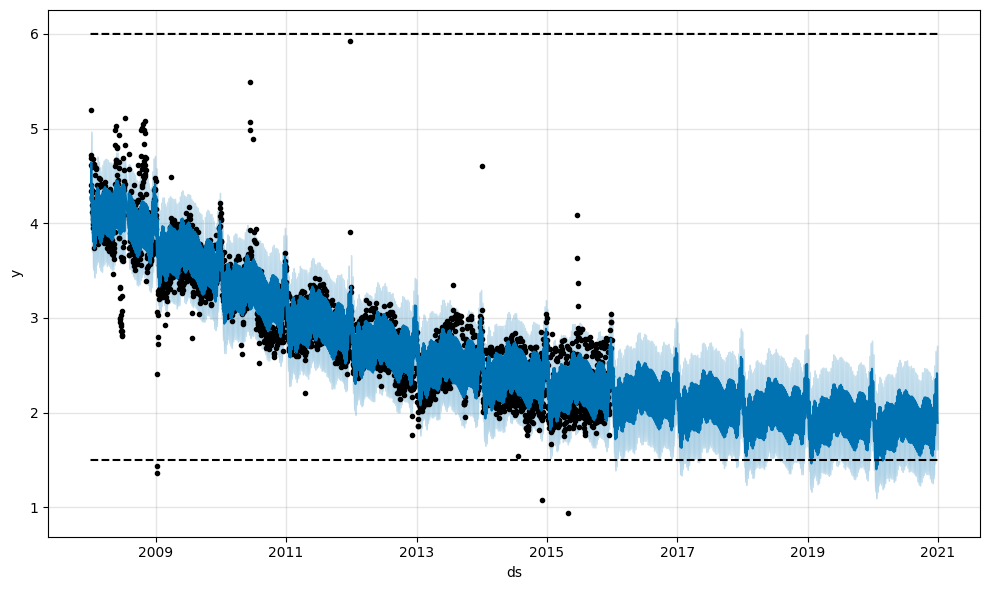

In [11]:
df['y'] = 10 - df['y']
df['cap'] = 6
df['floor'] = 1.5
future['cap'] = 6
future['floor'] = 1.5
m = Prophet(growth='logistic')
m.fit(df)
fcst = m.predict(future)
fig = m.plot(fcst)
